In [1]:
#Exercício 1
from numpy import array, empty, copy, loadtxt,linspace
A=loadtxt('matriz 1.txt')
v=loadtxt('vetor 1.txt')
def R(A, v):
    swaps = []   
    N = len(v)
    for m in range(N):
        largest = abs(A[m, m])
        largest_row = m
        for i in range(m + 1, N):
            if abs(A[i, m]) > largest:
                largest = A[i, m]
                largest_row = i
        if largest_row != m:
            current = copy(A[m, :])
            A[m, :] = A[largest_row, :]
            A[largest_row, :] = current
        div = A[m,m]
        A[m, :] /= div
        v[m] /= div
        for i in range(m + 1, N):
            mult = A[i, m]
            A[i, :] -= mult * A[m, :]
            v[i] -= mult * v[m]
    x = empty(N, float)
    for m in range(N-1, -1, -1):
        x[m] = v[m]
        for i in range(m+1, N):
            x[m] -= A[m, i] * x[i]

    return x
print(R(A,v))

[ 8.33333333 13.33333333 13.33333333]


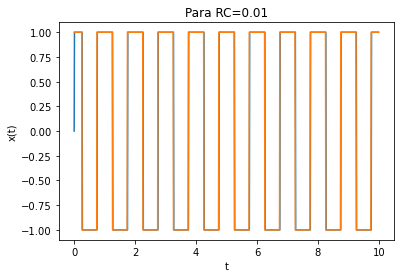

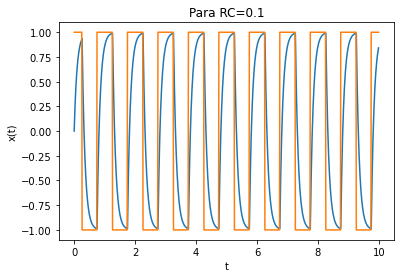

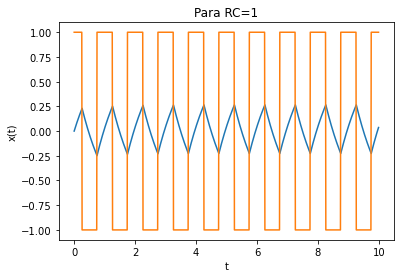

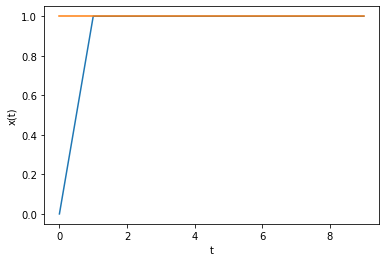

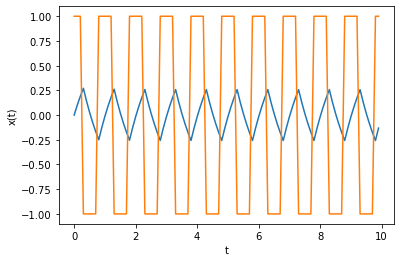

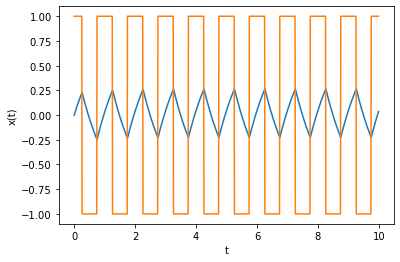

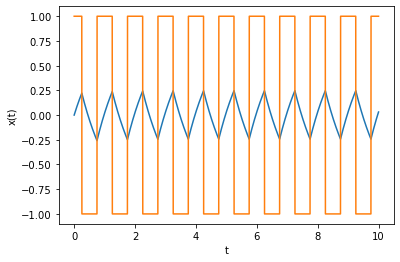

In [8]:
#Exercício 2
from math import sin
from numpy import arange
from scipy import floor, linspace, array, zeros, copy
from scipy.fftpack import rfft, irfft
import pylab

#a) e b)


#funções


def v_in(t):
    if round(2*t)%2==0:
        return 1   
    else:
        return (-1)

def f(t,v_out,RC):
    x=(1/(RC))*(v_in(t)-v_out)
    return  x


#função a correr
def f_2(RC):
    a=0.0
    b=10.0
    N=1000
    h=(b-a)/N
    tpoints=arange(a,b,h)
    x=0.0
    vpoints= []
    ipoints= []
    for t in tpoints:
        vpoints.append(x)
        x+=h*f(t,x,RC)
        ipoints.append(v_in(t))
    return tpoints,vpoints,ipoints
        

#separados    
pylab.plot(f_2(0.01)[0],f_2(0.01)[1])
pylab.plot(f_2(0.01)[0],f_2(0.01)[2])
pylab.xlabel("t")
pylab.ylabel("x(t)")
pylab.title("Para RC=0.01")
pylab.show()
pylab.plot(f_2(0.1)[0],f_2(0.1)[1])
pylab.plot(f_2(0.1)[0],f_2(0.1)[2])
pylab.xlabel("t")
pylab.ylabel("x(t)")
pylab.title("Para RC=0.1")
pylab.show()
pylab.plot(f_2(1)[0],f_2(1)[1])
pylab.plot(f_2(1)[0],f_2(1)[2])
pylab.xlabel("t")
pylab.ylabel("x(t)")
pylab.title("Para RC=1")
pylab.show()

#A amplitude vai diminuir ao aumentar o RC.


#fixar o RC em 1 e variar o N
def f_3(N):
    RC=1
    a=0.0
    b=10.0
    h=(b-a)/N
    tpoints=arange(a,b,h)
    x=0.0
    vpoints= []
    ipoints= []
    for t in tpoints:
        vpoints.append(x)
        x+=h*f(t,x,RC)
        ipoints.append(v_in(t))
    return tpoints,vpoints,ipoints

#passo pequeno    
pylab.plot(f_3(10)[0],f_3(10)[1])
pylab.plot(f_3(10)[0],f_3(10)[2])
pylab.xlabel("t")
pylab.ylabel("x(t)")
pylab.show()
pylab.plot(f_3(100)[0],f_3(100)[1])
pylab.plot(f_3(100)[0],f_3(100)[2])
pylab.xlabel("t")
pylab.ylabel("x(t)")
pylab.show()
pylab.plot(f_3(1000)[0],f_3(1000)[1])
pylab.plot(f_3(1000)[0],f_3(1000)[2])
pylab.xlabel("t")
pylab.ylabel("x(t)")
pylab.show()
pylab.plot(f_3(10000)[0],f_3(10000)[1])
pylab.plot(f_3(10000)[0],f_3(10000)[2])
pylab.xlabel("t")
pylab.ylabel("x(t)")
pylab.show()


#ao aumentar o N temos cada vez uma função aproximada melhor, no entanto, demora mais tempo.
#Aqui não se verificou esse aumento de tempo.

#c)




<ipython-input-13-a9800489e3af>:27: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  tpoints = arange(t_i, t_f, h)
<ipython-input-13-a9800489e3af>:30: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r = array([x_0, y_0], float)
<ipython-input-13-a9800489e3af>:20: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  return array([f_x, f_y], float)
<ipython-input-13-a9800489e3af>:27: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  tpoints = arange(t_i, t_f, h)
<ipython-input-13-a9800489e3af>:30: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r = array([x_0, y_0], float)
<ipython-input-13-a9800489e3af>:20: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use nump

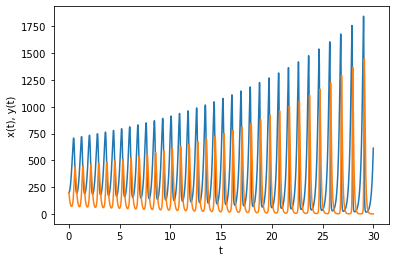

In [13]:
#Exercício 3
from scipy import array, arange
from pylab import plot, show, xlabel, ylabel


def f(r):
    a = 1
    b = 0.5
    g = 0.5
    d = 2
    x = r[0]
    y = r[1]
    f_x= a * x - b * x * y
    f_y= g * x * y - d * y
    return array([f_x, f_y], float)

def f_2(t_i,t_f):
    x_0 = 2
    y_0 = 2
    N = 20000
    h = (t_f - t_i) / N
    tpoints = arange(t_i, t_f, h)
    xpoints = []
    ypoints = []
    r = array([x_0, y_0], float)
    for t in tpoints:
        x=r[0]*100
        y=r[1]*100
        xpoints.append(x)
        ypoints.append(y)
        k1 = h * f(r)
        k2 = h * f(r + 0.5 * k1)
        k3 = h * f(r + 0.5 * k2)
        k4 = h * f(r + k3)
        r += (k1 + 2 * k2 + 2 * k3 + k4)
    return tpoints,xpoints,ypoints

plot(f_2(0,30)[0], f_2(0,30)[1])
plot(f_2(0,30)[0], f_2(0,30)[2])
xlabel('t')
ylabel('x(t), y(t)')
show()

#os coelhos reproduzem-se a uma taxa proporcional à sua população e são comidos pelas 
#raposas a uma taxa proporcional à população de coelhos e raposas e ao mesmo tempo as 
#raposas reproduzem-se a uma taxa proporcional à taxa a que comem coelhos
#sendo assim temos que é necessário uma maior população de coelhos do que raposas
#não as levem a extinção e deixem de existir e tbm para que as raposas não se levem a
#elas mesmas a extinção por falta de alimento, isto é, coelhos.
#a diminuição e aumento, tem a ver com as estações do tempo, em que numa altura estamos
#na altura de caça intensiva, onde existi diminuição da população e depois. e depois o
#fator idade. e as populações animais tem tedência a aumentar só come estes fatores.
#porque em geral tem sempre mais filhos que o necessário para terem a certeza que a
#espécie continua viva.

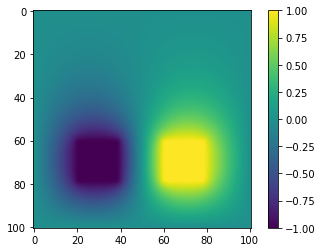

In [10]:
#Exercício 4
import pylab as plt
import numpy as np
M=100 #grelha 100x100
target=1e-6 #criterio de convergencia
h=1e-10 #passo da derivada, ou seja, fator que multiplica o rho ao rearranjar os termos da equação de Poisson com 
#a expressão das segundas derivadas

#Ao criar o array a zeros já tem lá as condições de fronteira da caixa
phi=np.zeros([M+1,M+1])

#condições de fronteira para as cargas
phi[int(3*M/5):int(4*M/5),int(3*M/5):int(4*M/5)]=1
phi[int(3*M/5):int(4*M/5),int(M/5):int(2*M/5)]=-1

#Cria-se um array rho para usar no calculo do potencial
rho=np.zeros([M+1,M+1])
rho[int(3*M/5):int(4*M/5),int(3*M/5):int(4*M/5)]=1
rho[int(3*M/5):int(4*M/5),int(M/5):int(2*M/5)]=-1

delta=1
w=0.95
while delta>target:
    oldphi=np.copy(phi)
    
    #Forçam
    phi[int(3*M/5):int(4*M/5),int(3*M/5):int(4*M/5)]=1
    phi[int(3*M/5):int(4*M/5),int(M/5):int(2*M/5)]=-1
    #Vetoriza-se para ser mais eficiente
    phi[1:M,1:M]=w*(phi[2:M+1,1:M]+phi[0:M-1,1:M]+phi[1:M,2:M+1]+phi[1:M,0:M-1]+h*h*rho[1:M,1:M])/4 +(1-w)*phi[1:M,1:M]
    
    delta=np.max(abs(phi-oldphi))
plt.imshow(phi)
plt.colorbar()
plt.show()
#Apresenta-se o gráfico de densidade, que se comporta como esperado